# Import Data Set and Deal with Data Set

**Step 1: First import the datase**

In [2]:
import pandas as pd

file_path = "melb_housing_filtered3.csv"

data = pd.read_csv(file_path)

This data set has removed outliers. Here we modify the representation format of ADDRESS, and then remove DATE, YEARBUILT, LATTITUDE and LONGTITUDE:

**Step 2: Delete some irrelevant or no longer necessary columns**

In [3]:
data['ADDRESS'] = data['ADDRESS'].str.split().str[-2:].str.join(' ')
# 删除"DATE"和"YEARBUILT"列
data.drop(columns=['DATE', 'YEARBUILT', 'LATTITUDE', 'LONGTITUDE'], inplace=True)

Since price_by_area is obtained through LANDSIZE, BUILDGAR and PRICE, these three columns are also removed here:

In [4]:
data.drop(columns=['LANDSIZE', 'PRICE', 'BUILDINGAR', 'LANDSIZE'], inplace=True)

In [5]:
data.drop(columns=['PROPERTYCO'], inplace = True)

**Step 4: Divide into multiple sub-datasets according to type**

In [6]:
type_counts = data['TYPE'].value_counts()
print(type_counts)

h    4046
u    1414
t     571
Name: TYPE, dtype: int64


In [7]:
# Use groupby to group data according to the "TYPE" column
grouped = data.groupby('TYPE')

#Create a dictionary to store different types of sub-datasets
sub_datasets = {}

# Loop through each group and store it in a dictionary
for group_name, group_data in grouped:
     sub_datasets[group_name] = group_data

# Now you can access different types of subdatasets, for example:
house_data = sub_datasets['h'] # Get sub-datasets of type "house"
unit_data = sub_datasets['u'] # Get the sub-dataset of type "unit"
townhouse_data = sub_datasets['t'] # Get sub-datasets of type "townhouse"

Drop 'Type' from each dataset:

In [8]:
# Remove the "TYPE" column from the "house" type subdataset
house_data = sub_datasets['h'].drop(columns=['TYPE'])

# Remove the "TYPE" column from the "unit" type subdataset
unit_data = sub_datasets['u'].drop(columns=['TYPE'])

# Remove the "TYPE" column from the "townhouse" type subdataset
townhouse_data = sub_datasets['t'].drop(columns=['TYPE'])

# Features Selection

**Step 3: Perform correlation analysis on category variables in each sub-dataset.**

In [9]:
# List of column names
category_columns = ['SUBURB', 'ADDRESS', 'METHOD', 'SELLERG', 'COUNCILARE', 'REGIONNAME', 'POSTCODE', "AREANUM"]

# Change columns to category type in each subdataset
for dataset in [house_data, unit_data, townhouse_data]:
     dataset[category_columns] = dataset[category_columns].astype('category')

In [10]:
# Extract "category" data from "house_data"
house_data_category = house_data.select_dtypes(include='category')

# Extract "category" data from "unit_data"
unit_data_category = unit_data.select_dtypes(include='category')

# Extract "category" data from "townhouse_data"
townhouse_data_category = townhouse_data.select_dtypes(include='category')

house_data_category

In [11]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Create an empty correlation matrix
correlation_matrix = pd.DataFrame(index=house_data_category.columns, columns=house_data_category.columns)

# Loop to calculate Cramér's V and populate the correlation matrix
for col1 in house_data_category.columns:
     for col2 in house_data_category.columns:
         if col1 == col2:
             correlation_matrix.loc[col1, col2] = 1.0
         else:
             #Create contingency table
             contingency_table = pd.crosstab(house_data_category[col1], house_data_category[col2])
             chi2, _, _, _ = chi2_contingency(contingency_table)
             n = contingency_table.sum().sum()
             phi2 = chi2/n
             r, k = contingency_table.shape
             phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
             rcorr = r - ((r-1)**2)/(n-1)
             kcorr = k - ((k-1)**2)/(n-1)
             correlation_matrix.loc[col1, col2] = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Display correlation matrix
print(correlation_matrix)

              SUBURB   ADDRESS    METHOD   SELLERG  POSTCODE COUNCILARE  \
SUBURB           1.0  0.497127  0.154173  0.338493  0.987244   0.953814   
ADDRESS     0.497127       1.0       0.0  0.285704  0.490121   0.492935   
METHOD      0.154173       0.0       1.0  0.116533  0.150429   0.142439   
SELLERG     0.338493  0.285704  0.116533       1.0  0.310035   0.446842   
POSTCODE    0.987244  0.490121  0.150429  0.310035       1.0   0.947228   
COUNCILARE  0.953814  0.492935  0.142439  0.446842  0.947228        1.0   
REGIONNAME  0.965989  0.528214   0.11071  0.527918   0.93845    0.80243   
AREANUM     0.965893  0.455298  0.092873  0.496796  0.952599   0.743758   

           REGIONNAME   AREANUM  
SUBURB       0.965989  0.965893  
ADDRESS      0.528214  0.455298  
METHOD        0.11071  0.092873  
SELLERG      0.527918  0.496796  
POSTCODE      0.93845  0.952599  
COUNCILARE    0.80243  0.743758  
REGIONNAME        1.0  0.495689  
AREANUM      0.495689       1.0  


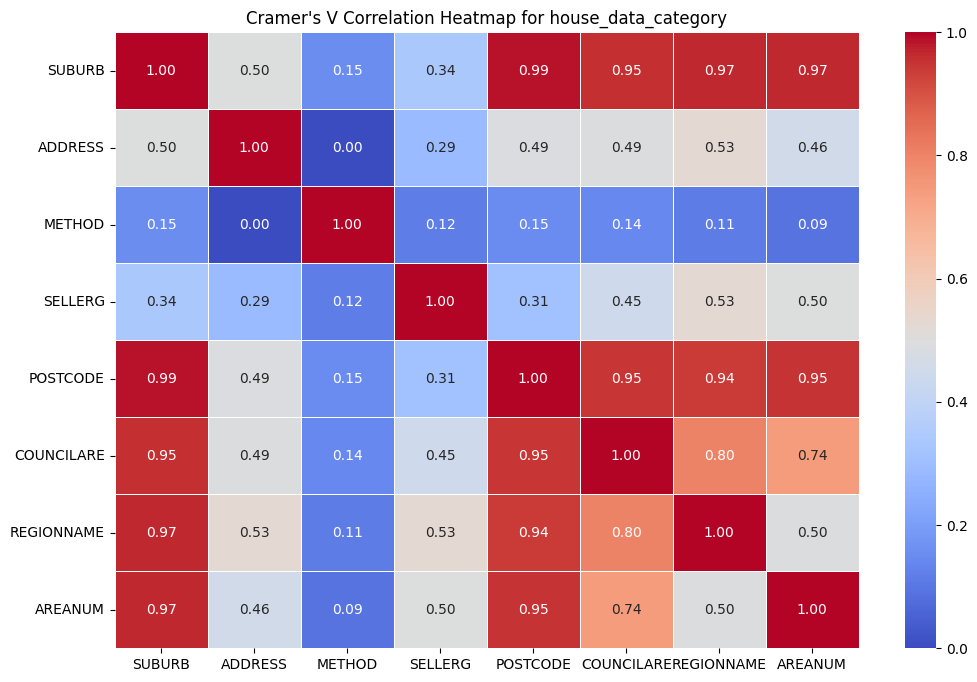

In [12]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create an empty correlation matrix
correlation_matrix = pd.DataFrame(index=house_data_category.columns, columns=house_data_category.columns)

# Loop to calculate Cramér's V and populate the correlation matrix
for col1 in house_data_category.columns:
    for col2 in house_data_category.columns:
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 1.0
        else:
            # Create contingency table
            contingency_table = pd.crosstab(house_data_category[col1], house_data_category[col2])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            phi2 = chi2 / n
            r, k = contingency_table.shape
            phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
            rcorr = r - ((r - 1) ** 2) / (n - 1)
            kcorr = k - ((k - 1) ** 2) / (n - 1)
            correlation_matrix.loc[col1, col2] = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Convert the correlation matrix to numeric
correlation_matrix = correlation_matrix.apply(pd.to_numeric, errors='coerce')

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Cramer's V Correlation Heatmap for house_data_category")
plt.show()

The results show that there is a significant correlation between "SUBURB", "COUNCILARE", "POSTCODE", "REGIONNAME" and "AREANUM".

In [13]:
# Count the number of distinct values in the "SUBURB" column
suburb_count = house_data_category['SUBURB'].nunique()

# Count the number of distinct values in the "REGIONNAME" column
regionname_count = house_data_category['REGIONNAME'].nunique()

# Count the number of distinct values in the "COUNCILARE" column
councilare_count = house_data_category['COUNCILARE'].nunique()

# POSTCODE
postcode_count = house_data_category['POSTCODE'].nunique()

# AREANUM
areanum_count =  house_data_category['AREANUM'].nunique()

print("Number of different values:")
print("SUBURB:", suburb_count)
print("REGIONNAME:", regionname_count)
print("COUNCILARE:", councilare_count)
print('POSTCODE', postcode_count)
print('AREANUM', areanum_count)

Number of different values:
SUBURB: 278
REGIONNAME: 8
COUNCILARE: 31
POSTCODE 180
AREANUM 9


Since the number of regionnames is minimal, retaining regionnames can simplify the model as much as possible.

In [14]:
# Remove "SUBURB" and "COUNCILARE" columns from "house_data"
house_data = house_data.drop(columns=['SUBURB', 'COUNCILARE', "POSTCODE", "AREANUM"])

uni_data_category

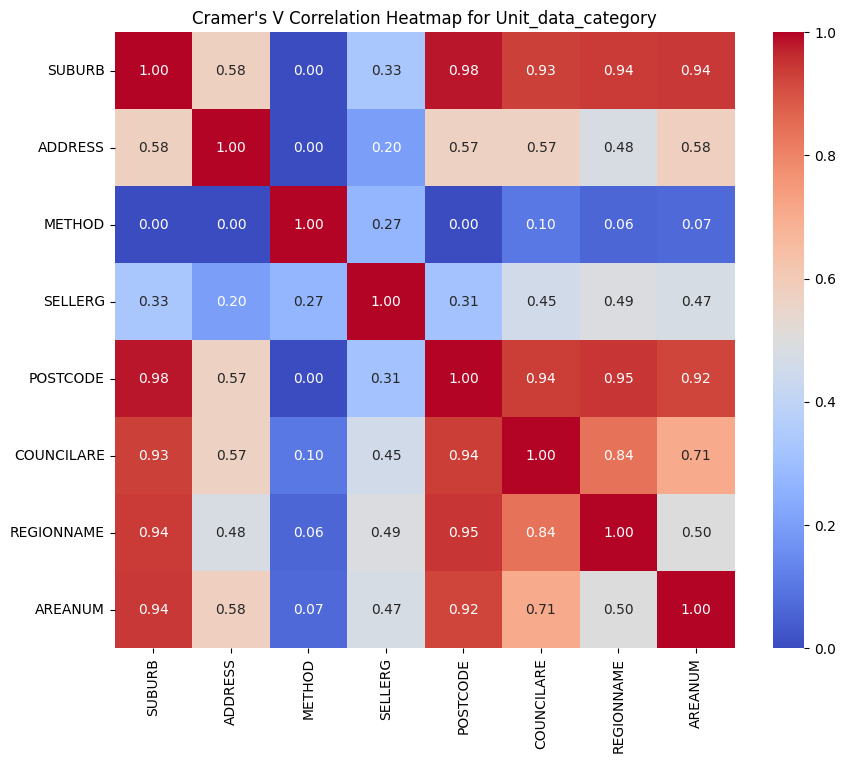

In [15]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create an empty correlation matrix
correlation_matrix = pd.DataFrame(index=unit_data_category.columns, columns=unit_data_category.columns)

# Loop to calculate Cramér's V and populate the correlation matrix
for col1 in unit_data_category.columns:
     for col2 in unit_data_category.columns:
         if col1 == col2:
             correlation_matrix.loc[col1, col2] = 1.0
         else:
             #Create contingency table
             contingency_table = pd.crosstab(unit_data_category[col1], unit_data_category[col2])
             chi2, _, _, _ = chi2_contingency(contingency_table)
             n = contingency_table.sum().sum()
             phi2 = chi2/n
             r, k = contingency_table.shape
             phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
             rcorr = r - ((r-1)**2)/(n-1)
             kcorr = k - ((k-1)**2)/(n-1)
             correlation_matrix.loc[col1, col2] = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Convert the correlation matrix to float
correlation_matrix = correlation_matrix.astype(float)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramer's V Correlation Heatmap for Unit_data_category")
plt.show()

In [16]:
# Count the number of distinct values in the "SUBURB" column
suburb_count = unit_data_category['SUBURB'].nunique()

# Count the number of distinct values in the "REGIONNAME" column
regionname_count = unit_data_category['REGIONNAME'].nunique()

# Count the number of distinct values in the "COUNCILARE" column
councilare_count = unit_data_category['COUNCILARE'].nunique()

# POSTCODE
postcode_count = unit_data_category['POSTCODE'].nunique()

# AREANUM
areanum_count =  unit_data_category['AREANUM'].nunique()

print("Number of different values:")
print("SUBURB:", suburb_count)
print("REGIONNAME:", regionname_count)
print("COUNCILARE:", councilare_count)
print('POSTCODE', postcode_count)
print('AREANUM', areanum_count)

Number of different values:
SUBURB: 167
REGIONNAME: 6
COUNCILARE: 25
POSTCODE 124
AREANUM 9


Based on approximate results and for the same reason, 'SUBURB', 'COUNCILARE', "POSTCODE" and "AREANUM" will be removed here.

In [17]:
unit_data = unit_data.drop(columns=['SUBURB', 'COUNCILARE', "POSTCODE", "AREANUM"])

townhouse_data

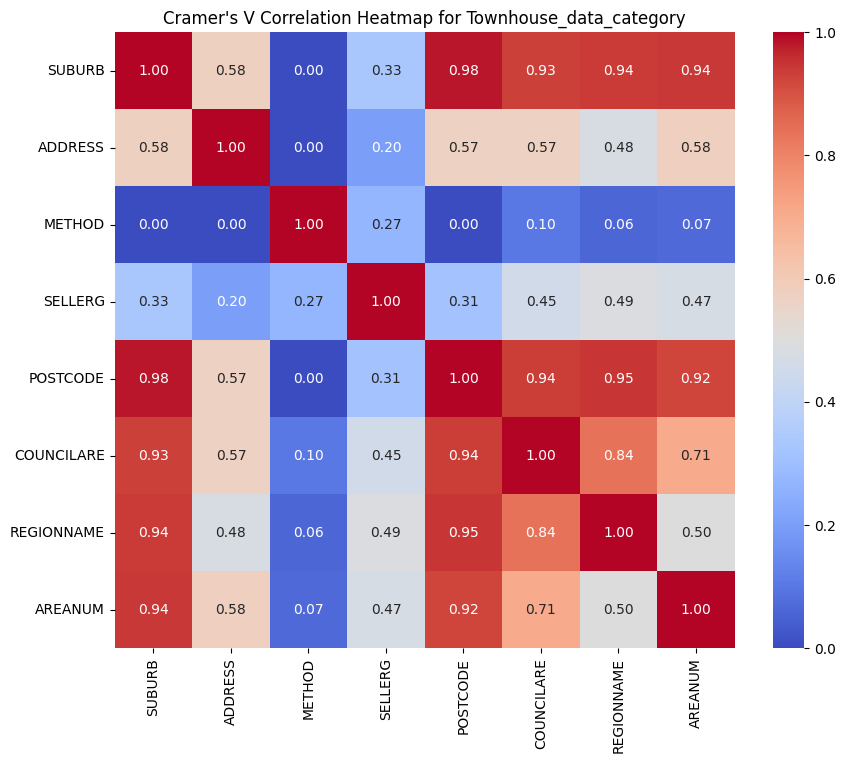

In [18]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create an empty correlation matrix
correlation_matrix = pd.DataFrame(index=townhouse_data_category.columns, columns=unit_data_category.columns)

# Loop to calculate Cramér's V and populate the correlation matrix
for col1 in unit_data_category.columns:
     for col2 in unit_data_category.columns:
         if col1 == col2:
             correlation_matrix.loc[col1, col2] = 1.0
         else:
             #Create contingency table
             contingency_table = pd.crosstab(unit_data_category[col1], unit_data_category[col2])
             chi2, _, _, _ = chi2_contingency(contingency_table)
             n = contingency_table.sum().sum()
             phi2 = chi2/n
             r, k = contingency_table.shape
             phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
             rcorr = r - ((r-1)**2)/(n-1)
             kcorr = k - ((k-1)**2)/(n-1)
             correlation_matrix.loc[col1, col2] = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Convert the correlation matrix to float
correlation_matrix = correlation_matrix.astype(float)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramer's V Correlation Heatmap for Townhouse_data_category")
plt.show()

In [19]:
# Count the number of distinct values in the "SUBURB" column
suburb_count = townhouse_data_category['SUBURB'].nunique()

# Count the number of distinct values in the "REGIONNAME" column
regionname_count = townhouse_data_category['REGIONNAME'].nunique()

# Count the number of distinct values in the "COUNCILARE" column
councilare_count = townhouse_data_category['COUNCILARE'].nunique()

# POSTCODE
postcode_count = townhouse_data_category['POSTCODE'].nunique()

# AREANUM
areanum_count =  townhouse_data_category['AREANUM'].nunique()

print("Number of different values:")
print("SUBURB:", suburb_count)
print("REGIONNAME:", regionname_count)
print("COUNCILARE:", councilare_count)
print('POSTCODE', postcode_count)
print('AREANUM', areanum_count)

Number of different values:
SUBURB: 138
REGIONNAME: 5
COUNCILARE: 23
POSTCODE 105
AREANUM 8


Based on approximate results and for the same reason, 'SUBURB', 'COUNCILARE', "POSTCODE" amd "AREANUM" will be removed here.

In [20]:
townhouse_data_category = townhouse_data_category.drop(columns=['SUBURB', 'COUNCILARE', "POSTCODE", "AREANUM"])

**step 4: Perform correlation analysis on category variables in each sub-dataset.**

In [21]:
# Extract integer and floating point data from "house_data"
house_data_num = house_data.select_dtypes(include=['int64', 'float64'])

# Extract integer and floating point data from "unit_data"
unit_data_num = unit_data.select_dtypes(include=['int64', 'float64'])

# Extract integer and floating point data from "townhouse_data"
townhouse_data_num = townhouse_data.select_dtypes(include=['int64', 'float64'])

# Exclude "price_by_area" column from "house_data"
house_data_num = house_data_num.drop(columns=['price_by_area'])

# Exclude "price_by_area" column from "unit_data"
unit_data_num = unit_data_num.drop(columns=['price_by_area'])

# Exclude "price_by_area" column from "townhouse_data"
townhouse_data_num = townhouse_data_num.drop(columns=['price_by_area'])

house_data

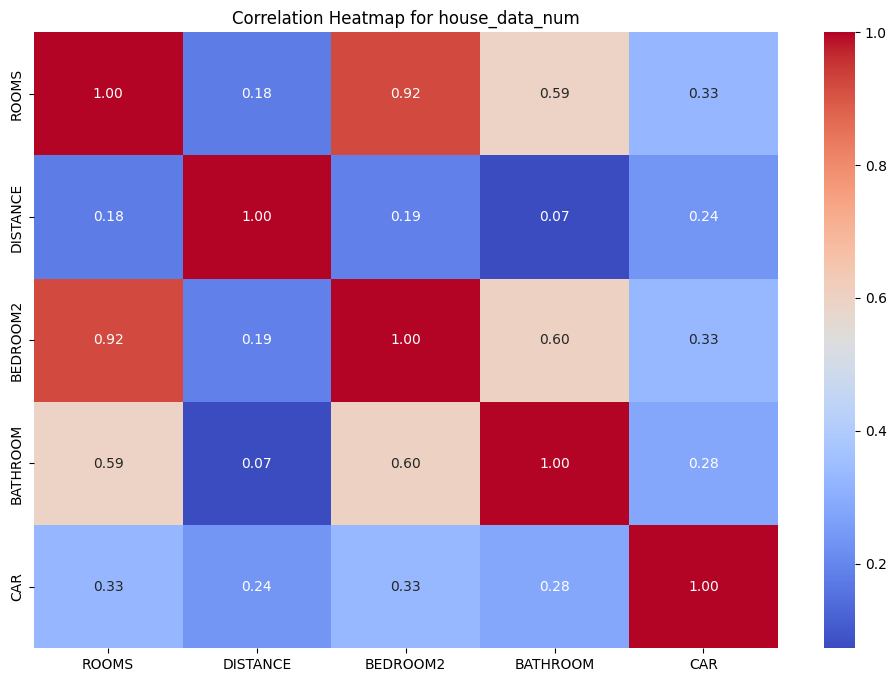

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = house_data_num.corr()

# Visualize the correlation matrix using heatmaps
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for house_data_num")
plt.show()

From the visual results, there is a high or moderate positive correlation between ROOMS and BEDROOM2 and BATHROOM. Here we choose to remove BEDROOM2 and BATHROOM.

In [23]:
# Remove the "BEDROOM2" and "BATHROOM" columns from "house_data"
house_data = house_data.drop(columns=['BEDROOM2', 'BATHROOM'])

unit_data

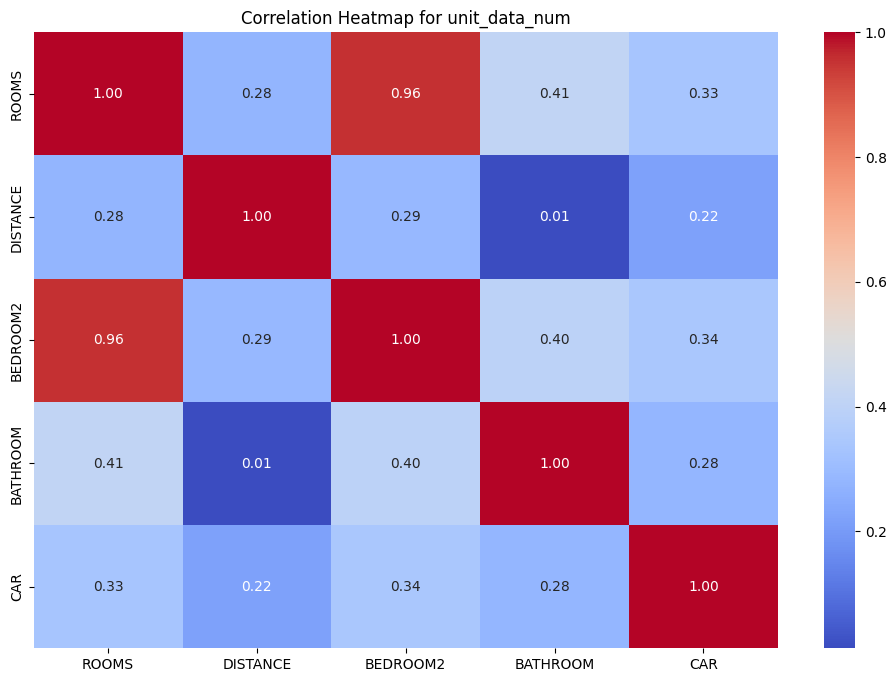

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = unit_data_num.corr()

# Visualize the correlation matrix using heatmaps
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for unit_data_num")
plt.show()

It can be found that for Unit type data, there is no obvious positive correlation between ROOM2 and BATHROOM.

So only "BEDROOM2" is removed here.

In [25]:
# Remove the "BEDROOM2" and "BATHROOM" columns from "house_data"
unit_data = unit_data.drop(columns=['BEDROOM2'])

townhouse_data

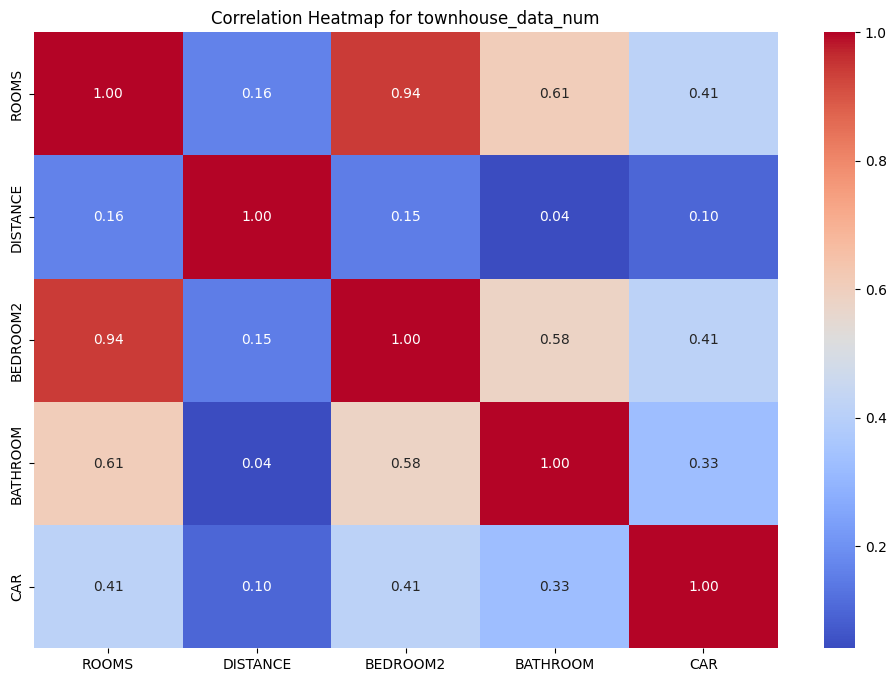

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = townhouse_data_num.corr()

# Visualize the correlation matrix using heatmaps
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for townhouse_data_num")
plt.show()

The correlations shown by the numerical variables of TOWNHOUSE and HOUSE are basically close.

In [27]:
# Remove the "BEDROOM2" and "BATHROOM" columns from "house_data"
townhouse_data = townhouse_data.drop(columns=['BEDROOM2', 'BATHROOM'])

# Models Building

## Generate new variables as target variable

house_data

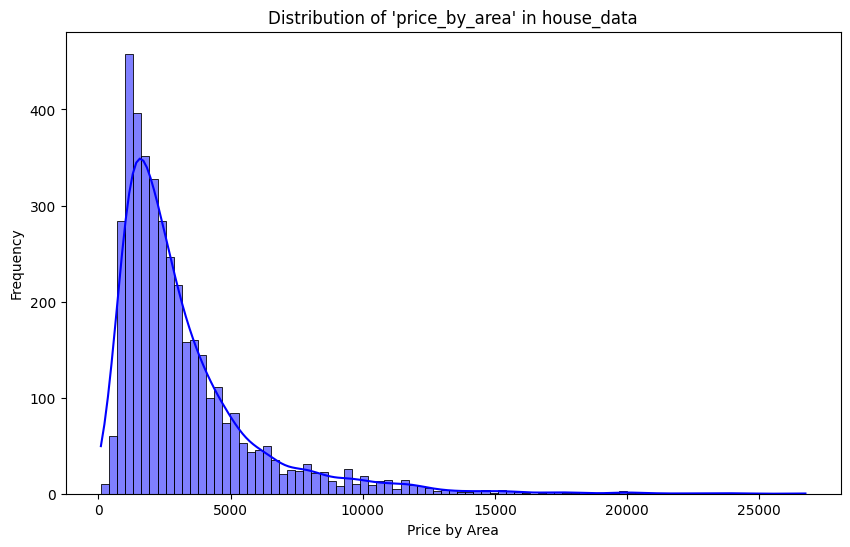

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(house_data['price_by_area'], kde=True, color='b')
plt.title("Distribution of 'price_by_area' in house_data")
plt.xlabel("Price by Area")
plt.ylabel("Frequency")
plt.show()

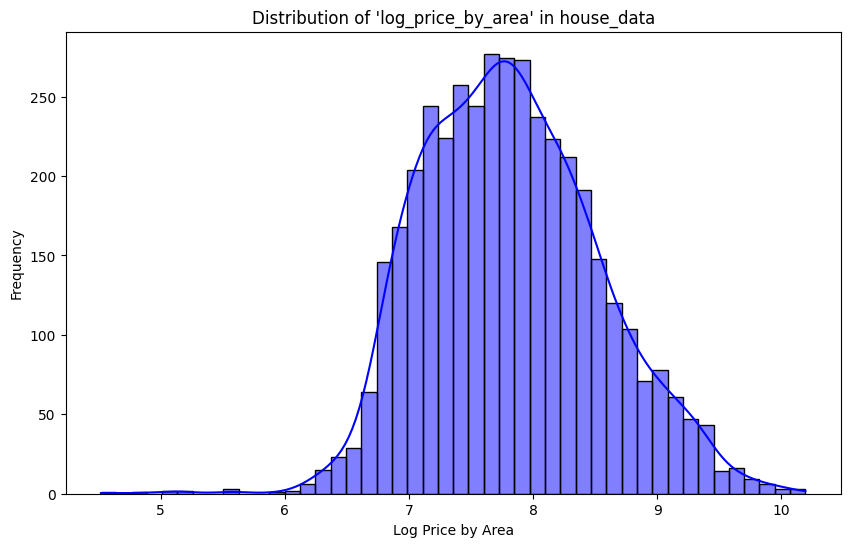

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

house_data['log_price_by_area'] = np.log(house_data['price_by_area'])

plt.figure(figsize=(10, 6))
sns.histplot(house_data['log_price_by_area'], kde=True, color='b')
plt.title("Distribution of 'log_price_by_area' in house_data")
plt.xlabel("Log Price by Area")
plt.ylabel("Frequency")
plt.show()

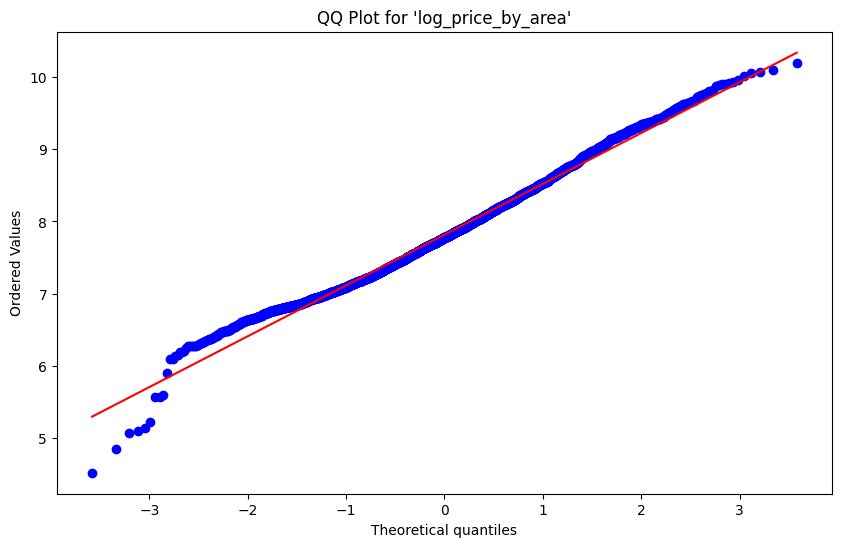

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(house_data['log_price_by_area'], dist="norm", plot=plt)
plt.title("QQ Plot for 'log_price_by_area'")
plt.show()

In [31]:
import numpy as np

mean_log_price = np.mean(house_data['log_price_by_area'])
std_log_price = np.std(house_data['log_price_by_area'])

lower_limit = mean_log_price - 3 * std_log_price
upper_limit = mean_log_price + 3 * std_log_price

filtered_house_data = house_data[(house_data['log_price_by_area'] >= lower_limit) & (house_data['log_price_by_area'] <= upper_limit)]

num_outliers_removed = len(house_data) - len(filtered_house_data)
print(f"Number of outliers removed: {num_outliers_removed}")

Number of outliers removed: 15


C:\Users\yejiu\AppData\Local\Temp\ipykernel_20644\2208989586.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_house_data['log_price_by_area'] = np.log(filtered_house_data['price_by_area'])


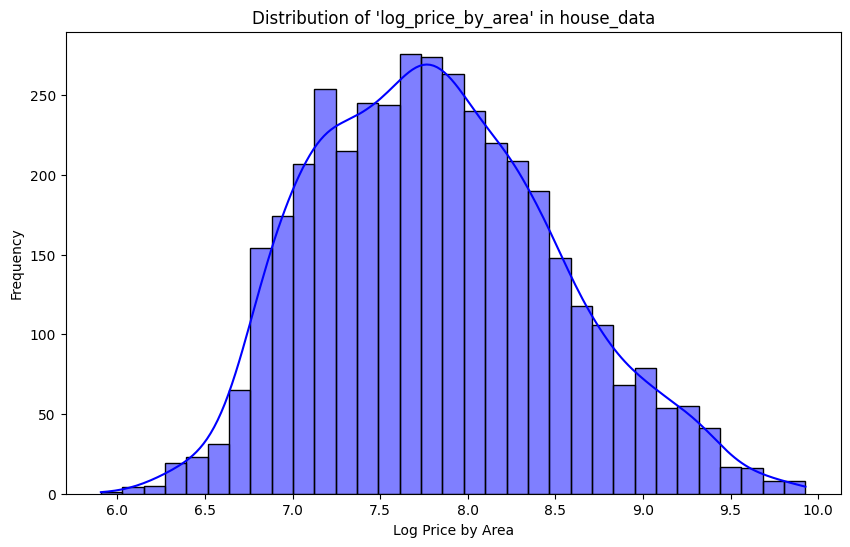

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

filtered_house_data['log_price_by_area'] = np.log(filtered_house_data['price_by_area'])

plt.figure(figsize=(10, 6))
sns.histplot(filtered_house_data['log_price_by_area'], kde=True, color='b')
plt.title("Distribution of 'log_price_by_area' in house_data")
plt.xlabel("Log Price by Area")
plt.ylabel("Frequency")
plt.show()

In [33]:
import pandas as pd

filtered_house_data.drop('price_by_area', axis=1, inplace=True)

filtered_house_data['log_price_by_area_interval'] = pd.cut(
    filtered_house_data['log_price_by_area'],
    bins=[6, 7, 8, 9, 10],
    labels=['6-7', '7-8', '8-9', '9-10']
)

valid_intervals = ['6-7', '7-8', '8-9', '9-10']
filtered_house_data = filtered_house_data[filtered_house_data['log_price_by_area_interval'].isin(valid_intervals)]

filtered_house_data.drop('log_price_by_area', axis=1, inplace=True)

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\yejiu\AppData\Local\Temp\ipykernel_20644\427615544.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_house_data['log_price_by_area_interval'] = pd.cut(


In [34]:
filtered_house_data

,ADDRESS,ROOMS,METHOD,SELLERG,DISTANCE,CAR,REGIONNAME,log_price_by_area_interval
0,Bloomburg St,2,S,Biggin,2.5,0,Northern Metropolitan,8-9
1,Charles St,3,SP,Biggin,2.5,0,Northern Metropolitan,9-10
2,Park St,4,VB,Nelson,2.5,2,Northern Metropolitan,9-10
3,Yarra St,3,S,Nelson,2.5,0,Northern Metropolitan,8-9
4,Charles St,2,S,Nelson,2.5,2,Northern Metropolitan,8-9
...,...,...,...,...,...,...,...,...
6024,Bamford Av,4,S,YPA,16.5,2,Northern Metropolitan,7-8
6025,Pershore Ct,3,S,Barry,16.5,1,Northern Metropolitan,6-7
6026,Sherwin St,3,S,Ray,35.5,1,Northern Victoria,6-7
6027,Cecil St,3,VB,Williams,6.8,0,Western Metropolitan,8-9


In [35]:
# Calculate the frequency of different types in the "price_by_area_interval" column
frequency = filtered_house_data['log_price_by_area_interval'].value_counts()

#Print frequency results
print(frequency)

7-8     2025
8-9     1294
6-7      471
9-10     240
Name: log_price_by_area_interval, dtype: int64


unit_data

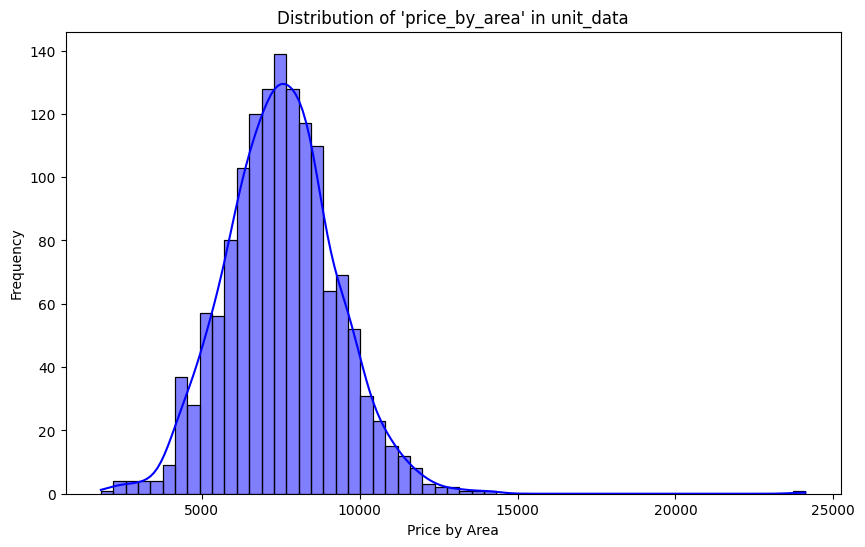

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(unit_data['price_by_area'], kde=True, color='b')
plt.title("Distribution of 'price_by_area' in unit_data")
plt.xlabel("Price by Area")
plt.ylabel("Frequency")
plt.show()

In [37]:
import numpy as np

mean_price_by_area = unit_data['price_by_area'].mean()
std_price_by_area = unit_data['price_by_area'].std()

lower_limit = mean_price_by_area - 3 * std_price_by_area
upper_limit = mean_price_by_area + 3 * std_price_by_area

unit_data = unit_data[(unit_data['price_by_area'] >= lower_limit) & (unit_data['price_by_area'] <= upper_limit)]

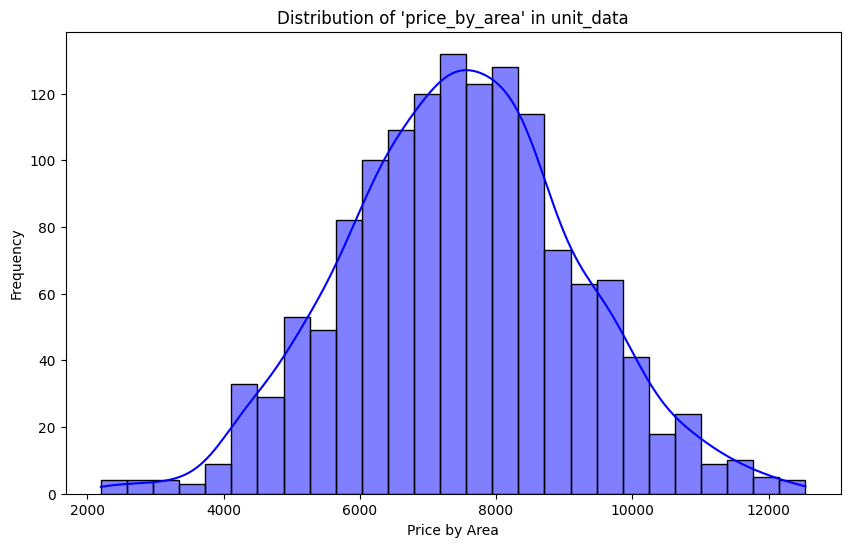

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(unit_data['price_by_area'], kde=True, color='b')
plt.title("Distribution of 'price_by_area' in unit_data")
plt.xlabel("Price by Area")
plt.ylabel("Frequency")
plt.show()

In [39]:
import pandas as pd

# Define price range rules
price_bins = [2000, 4000, 6000, 10000, float('inf')]
price_labels = ['2000-4000', '4000-6000', '6000-10000', 'Above 10000']

# Use the cut function to map "price_by_area" to the interval
unit_data['price_by_area_interval'] = pd.cut(unit_data['price_by_area'], bins=price_bins, labels=price_labels, right=False)

# Convert the result to a category of string type
unit_data['price_by_area_interval'] = unit_data['price_by_area_interval'].astype('category')

In [40]:
# Calculate the frequency of different types in the "price_by_area_interval" column
frequency = unit_data['price_by_area_interval'].value_counts()

#Print frequency results
print(frequency)

6000-10000     1042
4000-6000       243
Above 10000     102
2000-4000        20
Name: price_by_area_interval, dtype: int64


townhouse_data

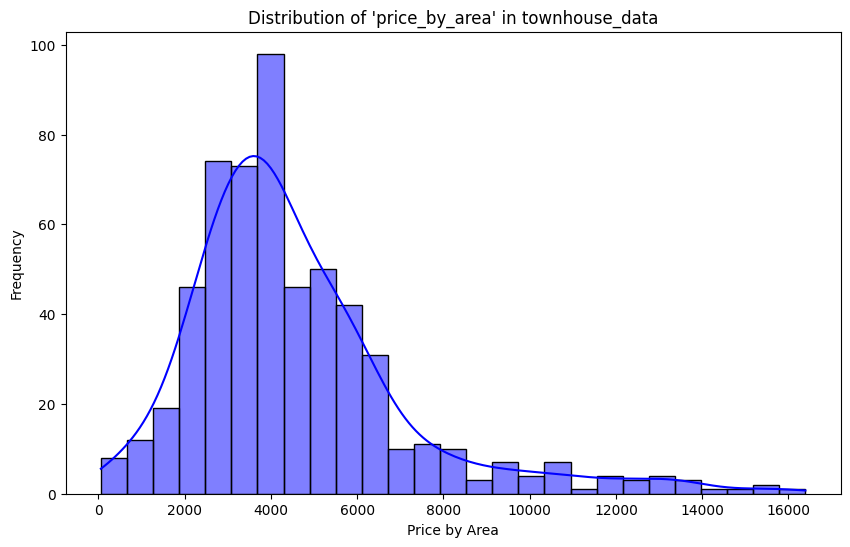

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(townhouse_data['price_by_area'], kde=True, color='b')
plt.title("Distribution of 'price_by_area' in townhouse_data")
plt.xlabel("Price by Area")
plt.ylabel("Frequency")
plt.show()

In [42]:
import numpy as np

mean_price_by_area = townhouse_data['price_by_area'].mean()
std_price_by_area = townhouse_data['price_by_area'].std()

lower_limit = mean_price_by_area - 3 * std_price_by_area
upper_limit = mean_price_by_area + 3 * std_price_by_area

townhouse_data = townhouse_data[(townhouse_data['price_by_area'] >= lower_limit) & (townhouse_data['price_by_area'] <= upper_limit)]

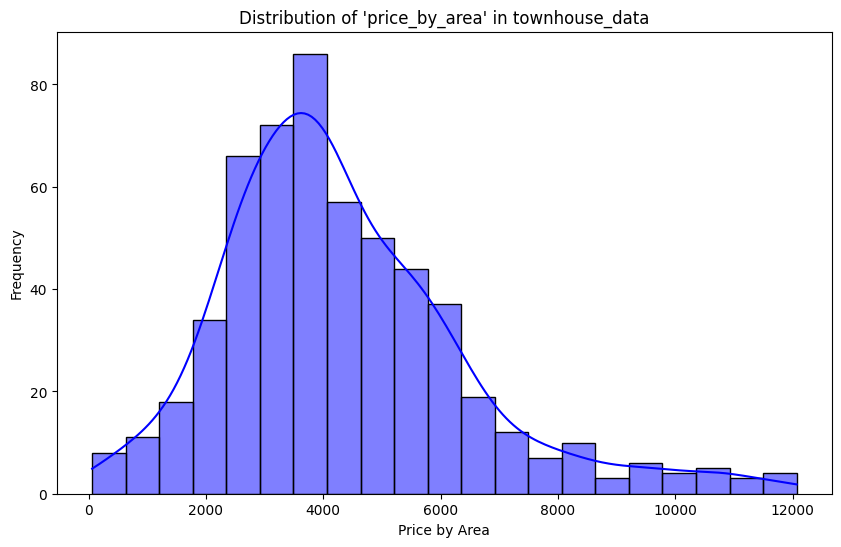

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(townhouse_data['price_by_area'], kde=True, color='b')
plt.title("Distribution of 'price_by_area' in townhouse_data")
plt.xlabel("Price by Area")
plt.ylabel("Frequency")
plt.show()

In [44]:
import pandas as pd

# Define price range rules
price_bins = [0, 2000, 6000, 10000, float('inf')]
price_labels = ['0-2000', '2000-6000', '6000-10000', 'above 10000']

# Use the cut function to map "price_by_area" to the interval
townhouse_data['price_by_area_interval'] = pd.cut(townhouse_data['price_by_area'], bins=price_bins, labels=price_labels, right=False)

In [45]:
# Calculate the frequency of different types in the "price_by_area_interval" column
frequency = townhouse_data['price_by_area_interval'].value_counts()

#Print frequency results
print(frequency)

2000-6000      420
6000-10000      78
0-2000          45
above 10000     13
Name: price_by_area_interval, dtype: int64


drop all price_by_area

In [46]:
# Remove the "price_by_area" column from "house_data"
house_data = house_data.drop(columns=['price_by_area'])

In [47]:
# Remove the "price_by_area" column from "unit_data"
unit_data = unit_data.drop(columns=['price_by_area'])

In [48]:
# Remove the "price_by_area" column from "townhouse_data"
townhouse_data = townhouse_data.drop(columns=['price_by_area'])

In [49]:
house_data.dtypes

ADDRESS              category
ROOMS                   int64
METHOD               category
SELLERG              category
DISTANCE              float64
CAR                     int64
REGIONNAME           category
log_price_by_area     float64
dtype: object

## One-hot encoding

In [50]:
# Perform one-hot encoding on categorical data in "house_data", except "price_by_area_interval"
filtered_house_data = pd.get_dummies(filtered_house_data, columns=[col for col in house_data.columns if house_data[col].dtype.name == 'category' and col != 'log_price_by_area_interval'])

# Perform one-hot encoding on categorical data in "unit_data", except "price_by_area_interval"
unit_data = pd.get_dummies(unit_data, columns=[col for col in unit_data.columns if unit_data[col].dtype.name == 'category' and col != 'price_by_area_interval'])

# Perform one-hot encoding on categorical data in "townhouse_data", except "price_by_area_interval"
townhouse_data = pd.get_dummies(townhouse_data, columns=[col for col in townhouse_data.columns if townhouse_data[col].dtype.name == 'category' and col != 'price_by_area_interval'])

In [51]:
filtered_house_data.dtypes

ROOMS                                       int64
DISTANCE                                  float64
CAR                                         int64
log_price_by_area_interval               category
ADDRESS_Abbotsford Gr                       uint8
                                           ...   
REGIONNAME_Northern Victoria                uint8
REGIONNAME_South-Eastern Metropolitan       uint8
REGIONNAME_Southern Metropolitan            uint8
REGIONNAME_Western Metropolitan             uint8
REGIONNAME_Western Victoria                 uint8
Length: 2659, dtype: object

In [52]:
unit_data.dtypes

ROOMS                                       int64
DISTANCE                                  float64
BATHROOM                                    int64
CAR                                         int64
price_by_area_interval                   category
                                           ...   
REGIONNAME_Eastern Victoria                 uint8
REGIONNAME_Northern Metropolitan            uint8
REGIONNAME_South-Eastern Metropolitan       uint8
REGIONNAME_Southern Metropolitan            uint8
REGIONNAME_Western Metropolitan             uint8
Length: 904, dtype: object

In [53]:
townhouse_data.dtypes

ROOMS                        int64
DISTANCE                   float64
CAR                          int64
price_by_area_interval    category
SUBURB_Aberfeldie            uint8
                            ...   
AREANUM_4                    uint8
AREANUM_5                    uint8
AREANUM_6                    uint8
AREANUM_7                    uint8
AREANUM_8                    uint8
Length: 837, dtype: object

## Models Building

#### house data

svm models

In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare features and target variables
X = filtered_house_data.drop(columns=['log_price_by_area_interval'])
y = filtered_house_data['log_price_by_area_interval']

# Define different RBF kernel SVM parameter combinations
rbf_svm_param_combinations = [
    {'C': 0.1, 'kernel': 'rbf', 'gamma': 'scale', 'random_state': 42},
    {'C': 1.0, 'kernel': 'rbf', 'gamma': 'scale', 'random_state': 42},
    {'C': 0.01, 'kernel': 'rbf', 'gamma': 'scale', 'random_state': 42},
    
    {'C': 0.1, 'kernel': 'rbf', 'gamma': 0.1, 'random_state': 42},
    {'C': 0.1, 'kernel': 'rbf', 'gamma': 0.01, 'random_state': 42},
    {'C': 0.1, 'kernel': 'rbf', 'gamma': 0.01, 'random_state': 42},
    
    {'C': 1.0, 'kernel': 'rbf', 'gamma': 0.1, 'random_state': 42},
    {'C': 1.0, 'kernel': 'rbf', 'gamma': 0.01, 'random_state': 42},
    {'C': 1.0, 'kernel': 'rbf', 'gamma': 0.001, 'random_state': 42},

    {'C': 10.0, 'kernel': 'rbf', 'gamma': 0.1, 'random_state': 42},
    {'C': 10.0, 'kernel': 'rbf', 'gamma': 0.01, 'random_state': 42}
]

#Train and evaluate different RBF kernel SVM models
svm_models = []
for params in rbf_svm_param_combinations:
     model = SVC(**params)
     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
     model.fit(X_train, y_train)
     y_pred = model.predict(X_test)
     accuracy = accuracy_score(y_test, y_pred)
     svm_models.append((model, accuracy))

#Print the accuracy of the SVM model
for i, (model, accuracy) in enumerate(svm_models):
     print(f"SVM Model {i + 1} - Parameters: {model.get_params()} - Accuracy: {accuracy:.2f}")

SVM Model 1 - Parameters: {'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False} - Accuracy: 0.66
SVM Model 2 - Parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False} - Accuracy: 0.67
SVM Model 3 - Parameters: {'C': 0.01, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False} - Accuracy: 0.63
SVM Model 4 - Parameters: {'C': 0.1,

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 选择最佳模型的索引
best_model_index = 10  # 在你的输出中，SVM Model 11 对应的索引是10

# 获取最佳模型
best_model, _ = svm_models[best_model_index]

# 使用最佳模型进行预测
y_pred = best_model.predict(X_test)

# 计算精确度、召回率和F1分数
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# 打印结果
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.71
Recall: 0.71
F1 Score: 0.70


In [55]:
import pandas as pd

# 创建一个包含性能指标的字典
performance_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
}

# 转换为DataFrame
performance_df = pd.DataFrame(performance_metrics)

# 打印表格
print(performance_df)

      Metric     Value
0   Accuracy  0.708437
1  Precision  0.707329
2     Recall  0.708437
3   F1 Score  0.696758


In [62]:
support_vector_indices = best_model.support_
num_support_vectors = len(support_vector_indices)
num_support_vectors

2477

In [63]:
decision_function_coefficients = best_model.dual_coef_
decision_function_coefficients

array([[ 10.        ,  10.        ,  10.        , ...,  -0.        ,
         -0.        ,  -0.        ],
       [  0.        ,  10.        ,   0.        , ...,  -0.        ,
         -0.        ,  -0.        ],
       [  0.        ,   4.49977723,   0.        , ..., -10.        ,
        -10.        , -10.        ]])

In [64]:
class_labels = best_model.classes_
class_labels

array(['6-7', '7-8', '8-9', '9-10'], dtype=object)

ANN Models

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Define feature variables (X) and target variables (y)
X = filtered_house_data.drop(columns=['log_price_by_area_interval'])
y = filtered_house_data['log_price_by_area_interval']

# Encode multi-category target variables into integer labels
label_mapping = {label: idx for idx, label in enumerate(y.unique())}
y_encoded = y.map(label_mapping)

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert integer labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Parameter combinations for ANN
param_combinations = [
    {'hidden_layer_1': 64, 'hidden_layer_2': 32, 'hidden_layer_3': 16, 'epochs': 20, 'batch_size': 32},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'hidden_layer_3': 32, 'epochs': 20, 'batch_size': 32},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 10, 'batch_size': 64},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 30, 'batch_size': 16},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 20, 'batch_size': 32, 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 20, 'batch_size': 32, 'optimizer': 'sgd', 'learning_rate': 0.01}
]

# Create a DataFrame to store model results
results_df = pd.DataFrame(columns=['Model Name', 'Parameters', 'Accuracy'])

# Create and train multiple ANN models
for i, params in enumerate(param_combinations):
    model_name = f"ann_model_{i+1}"
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    model.add(layers.Dense(params['hidden_layer_1'], activation='relu'))
    model.add(layers.Dense(params['hidden_layer_2'], activation='relu'))
    model.add(layers.Dense(len(label_mapping), activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train_one_hot, epochs=params['epochs'], batch_size=params['batch_size'], validation_split=0.2)
    
    y_pred_one_hot = model.predict(X_test)
    y_pred = np.argmax(y_pred_one_hot, axis=1)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append results to DataFrame
    results_df = results_df.append({
        'Model Name': model_name,
        'Parameters': params,
        'Accuracy': accuracy
    }, ignore_index=True)

# Output results
print(results_df)

Epoch 1/20
81/81 [==============================] - 1s 5ms/step - loss: 1.0606 - accuracy: 0.5529 - val_loss: 0.9122 - val_accuracy: 0.6341
Epoch 2/20
81/81 [==============================] - 0s 3ms/step - loss: 0.7982 - accuracy: 0.6700 - val_loss: 0.7876 - val_accuracy: 0.6481
Epoch 3/20
81/81 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.7080 - val_loss: 0.7202 - val_accuracy: 0.6682
Epoch 4/20
81/81 [==============================] - 0s 3ms/step - loss: 0.5781 - accuracy: 0.7584 - val_loss: 0.7018 - val_accuracy: 0.6899
Epoch 5/20
81/81 [==============================] - 0s 3ms/step - loss: 0.4924 - accuracy: 0.8147 - val_loss: 0.7069 - val_accuracy: 0.6899
Epoch 6/20
81/81 [==============================] - 0s 3ms/step - loss: 0.4221 - accuracy: 0.8484 - val_loss: 0.7264 - val_accuracy: 0.6837
Epoch 7/20
81/81 [==============================] - 0s 3ms/step - loss: 0.3600 - accuracy: 0.8713 - val_loss: 0.7690 - val_accuracy: 0.6760
Epoch 8/20
81/81 [==

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 提取第一个模型
model_name = "ann_model_1"  # 模型的名称
params = param_combinations[0]  # 第一个模型的参数

# 创建模型
model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))
model.add(layers.Dense(params['hidden_layer_1'], activation='relu'))
model.add(layers.Dense(params['hidden_layer_2'], activation='relu'))
model.add(layers.Dense(len(label_mapping), activation='softmax'))

# 编译和训练模型（这一部分已经在你的代码中）
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_one_hot, epochs=params['epochs'], batch_size=params['batch_size'], validation_split=0.2)

# 进行预测
y_pred_one_hot = model.predict(X_test)
y_pred = np.argmax(y_pred_one_hot, axis=1)

# 计算Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for {model_name}: {accuracy}")

# 计算Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision for {model_name}: {precision}")

# 计算Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall for {model_name}: {recall}")

# 计算F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score for {model_name}: {f1}")

Epoch 1/20
81/81 [==============================] - 1s 5ms/step - loss: 0.9875 - accuracy: 0.5603 - val_loss: 0.8437 - val_accuracy: 0.6326
Epoch 2/20
81/81 [==============================] - 0s 3ms/step - loss: 0.7404 - accuracy: 0.6646 - val_loss: 0.7624 - val_accuracy: 0.6419
Epoch 3/20
81/81 [==============================] - 0s 3ms/step - loss: 0.6293 - accuracy: 0.7309 - val_loss: 0.7004 - val_accuracy: 0.6806
Epoch 4/20
81/81 [==============================] - 0s 3ms/step - loss: 0.5439 - accuracy: 0.7832 - val_loss: 0.7009 - val_accuracy: 0.6853
Epoch 5/20
81/81 [==============================] - 0s 3ms/step - loss: 0.4719 - accuracy: 0.8244 - val_loss: 0.7003 - val_accuracy: 0.6946
Epoch 6/20
81/81 [==============================] - 0s 3ms/step - loss: 0.3889 - accuracy: 0.8666 - val_loss: 0.7231 - val_accuracy: 0.6946
Epoch 7/20
81/81 [==============================] - 0s 4ms/step - loss: 0.3287 - accuracy: 0.8802 - val_loss: 0.7684 - val_accuracy: 0.6822
Epoch 8/20
81/81 [==

In [77]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                170176    
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 4)                 132       
                                                                 
Total params: 172388 (673.39 KB)
Trainable params: 172388 (673.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
loss_function = model.loss
optimizer = model.optimizer

In [80]:
loss_function

'categorical_crossentropy'

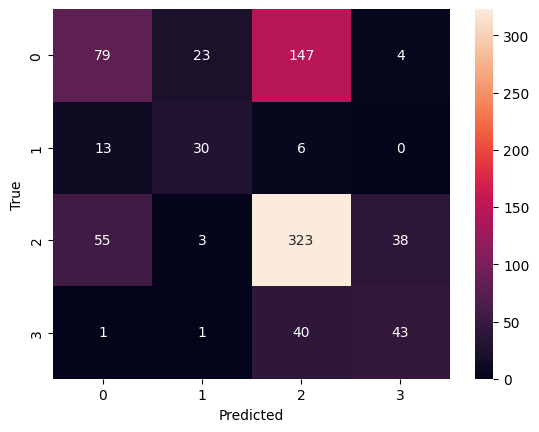

In [83]:
# 可以绘制混淆矩阵
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### unit data

SVM

In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare features and target variables
X = unit_data.drop(columns=['price_by_area_interval'])
y = unit_data['price_by_area_interval']

# Define different RBF kernel SVM parameter combinations
rbf_svm_param_combinations = [
    {'C': 0.1, 'kernel': 'rbf', 'gamma': 'scale', 'random_state': 42},
    {'C': 1.0, 'kernel': 'rbf', 'gamma': 'scale', 'random_state': 42},
    {'C': 0.01, 'kernel': 'rbf', 'gamma': 'scale', 'random_state': 42},
    
    {'C': 0.1, 'kernel': 'rbf', 'gamma': 0.1, 'random_state': 42},
    {'C': 0.1, 'kernel': 'rbf', 'gamma': 0.01, 'random_state': 42},
    {'C': 0.1, 'kernel': 'rbf', 'gamma': 0.01, 'random_state': 42},
    
    {'C': 1.0, 'kernel': 'rbf', 'gamma': 0.1, 'random_state': 42},
    {'C': 1.0, 'kernel': 'rbf', 'gamma': 0.01, 'random_state': 42},
    {'C': 1.0, 'kernel': 'rbf', 'gamma': 0.001, 'random_state': 42},

    {'C': 10.0, 'kernel': 'rbf', 'gamma': 0.1, 'random_state': 42},
    {'C': 10.0, 'kernel': 'rbf', 'gamma': 0.01, 'random_state': 42}
]

# Train and evaluate different RBF kernel SVM models
svm_models = []
for params in rbf_svm_param_combinations:
    model = SVC(**params)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    svm_models.append((model, accuracy))

# Print the accuracy of the SVM models
for i, (model, accuracy) in enumerate(svm_models):
    print(f"SVM Model {i + 1} - Parameters: {model.get_params()} - Accuracy: {accuracy:.2f}")

SVM Model 1 - Parameters: {'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False} - Accuracy: 0.73
SVM Model 2 - Parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False} - Accuracy: 0.73
SVM Model 3 - Parameters: {'C': 0.01, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False} - Accuracy: 0.73
SVM Model 4 - Parameters: {'C': 0.1,

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 从 svm_models 列表中提取 SVM Model 7
svm_model_7, accuracy_7 = svm_models[6]  # 请注意索引从0开始，所以SVM Model 7在索引6上

# 使用模型进行预测
y_pred_7 = svm_model_7.predict(X_test)

# 计算精确度、召回率和 F1 分数
precision_7 = precision_score(y_test, y_pred_7, average='weighted')
recall_7 = recall_score(y_test, y_pred_7, average='weighted')
f1_7 = f1_score(y_test, y_pred_7, average='weighted')

# 打印结果
print(f"SVM Model 7 Precision: {precision_7:.2f}")
print(f"SVM Model 7 Recall: {recall_7:.2f}")
print(f"SVM Model 7 F1 Score: {f1_7:.2f}")

SVM Model 7 Precision: 0.73
SVM Model 7 Recall: 0.82
SVM Model 7 F1 Score: 0.76


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [73]:
support_vector_indices = svm_model_7.support_
num_support_vectors = len(support_vector_indices)

In [74]:
num_support_vectors

915

ANN

In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Define feature variables (X) and target variables (y)
X = unit_data.drop(columns=['price_by_area_interval'])
y = unit_data['price_by_area_interval']

# Encode multi-category target variables into integer labels
label_mapping = {label: idx for idx, label in enumerate(y.unique())}
y_encoded = y.map(label_mapping)

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert integer labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Parameter combinations for ANN
param_combinations = [
    {'hidden_layer_1': 64, 'hidden_layer_2': 32, 'hidden_layer_3': 16, 'epochs': 20, 'batch_size': 32},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'hidden_layer_3': 32, 'epochs': 20, 'batch_size': 32},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 10, 'batch_size': 64},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 30, 'batch_size': 16},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 20, 'batch_size': 32, 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 20, 'batch_size': 32, 'optimizer': 'sgd', 'learning_rate': 0.01}
]

# Create a DataFrame to store model results
results_df = pd.DataFrame(columns=['Model Name', 'Parameters', 'Accuracy'])

# Create and train multiple ANN models
for i, params in enumerate(param_combinations):
    model_name = f"ann_model_{i+1}"
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    model.add(layers.Dense(params['hidden_layer_1'], activation='relu'))
    model.add(layers.Dense(params['hidden_layer_2'], activation='relu'))
    model.add(layers.Dense(len(label_mapping), activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train_one_hot, epochs=params['epochs'], batch_size=params['batch_size'], validation_split=0.2)
    
    y_pred_one_hot = model.predict(X_test)
    y_pred = np.argmax(y_pred_one_hot, axis=1)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append results to DataFrame
    results_df = results_df.append({
        'Model Name': model_name,
        'Parameters': params,
        'Accuracy': accuracy
    }, ignore_index=True)

# Output results
print(results_df)

Epoch 1/20
29/29 [==============================] - 1s 7ms/step - loss: 1.1092 - accuracy: 0.6733 - val_loss: 0.8732 - val_accuracy: 0.7600
Epoch 2/20
29/29 [==============================] - 0s 3ms/step - loss: 0.8008 - accuracy: 0.7378 - val_loss: 0.7239 - val_accuracy: 0.7600
Epoch 3/20
29/29 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.7456 - val_loss: 0.6673 - val_accuracy: 0.7511
Epoch 4/20
29/29 [==============================] - 0s 4ms/step - loss: 0.6428 - accuracy: 0.7689 - val_loss: 0.6461 - val_accuracy: 0.7467
Epoch 5/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5945 - accuracy: 0.7889 - val_loss: 0.6415 - val_accuracy: 0.7511
Epoch 6/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5496 - accuracy: 0.8078 - val_loss: 0.6279 - val_accuracy: 0.7600
Epoch 7/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5068 - accuracy: 0.8144 - val_loss: 0.6379 - val_accuracy: 0.7689
Epoch 8/20
29/29 [==

In [91]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 使用模型进行预测
y_pred_ann = np.argmax(model.predict(X_test), axis=1)

# 计算精确度、召回率和 F1 分数
precision_ann = precision_score(y_test, y_pred_ann, average='weighted')
recall_ann = recall_score(y_test, y_pred_ann, average='weighted')
f1_ann = f1_score(y_test, y_pred_ann, average='weighted')

# 打印结果
print(f"ann_model_3 Precision: {precision_ann:.2f}")
print(f"ann_model_3 Recall: {recall_ann:.2f}")
print(f"ann_model_3 F1 Score: {f1_ann:.2f}")

9/9 [==============================] - 0s 2ms/step
ann_model_3 Precision: 0.67
ann_model_3 Recall: 0.70
ann_model_3 F1 Score: 0.68


In [92]:
# Create and train multiple ANN models
for i, params in enumerate(param_combinations):
    model_name = f"ann_model_{i+1}"
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    model.add(layers.Dense(params['hidden_layer_1'], activation='relu'))
    model.add(layers.Dense(params['hidden_layer_2'], activation='relu'))
    model.add(layers.Dense(len(label_mapping), activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train_one_hot, epochs=params['epochs'], batch_size=params['batch_size'], validation_split=0.2)
    
    y_pred_one_hot = model.predict(X_test)
    y_pred = np.argmax(y_pred_one_hot, axis=1)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append results to DataFrame
    results_df = results_df.append({
        'Model Name': model_name,
        'Parameters': params,
        'Accuracy': accuracy
    }, ignore_index=True)
    
    # Print model summary for the third model
    if i == 2:
        model.summary()

# Output results
print(results_df)

Epoch 1/20
29/29 [==============================] - 1s 8ms/step - loss: 1.0052 - accuracy: 0.6944 - val_loss: 0.7855 - val_accuracy: 0.7600
Epoch 2/20
29/29 [==============================] - 0s 4ms/step - loss: 0.7786 - accuracy: 0.7389 - val_loss: 0.7039 - val_accuracy: 0.7600
Epoch 3/20
29/29 [==============================] - 0s 3ms/step - loss: 0.7049 - accuracy: 0.7489 - val_loss: 0.6809 - val_accuracy: 0.7333
Epoch 4/20
29/29 [==============================] - 0s 4ms/step - loss: 0.6486 - accuracy: 0.7700 - val_loss: 0.6594 - val_accuracy: 0.7333
Epoch 5/20
29/29 [==============================] - 0s 3ms/step - loss: 0.6002 - accuracy: 0.7944 - val_loss: 0.6531 - val_accuracy: 0.7467
Epoch 6/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5481 - accuracy: 0.8067 - val_loss: 0.6510 - val_accuracy: 0.7556
Epoch 7/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.8267 - val_loss: 0.6253 - val_accuracy: 0.7556
Epoch 8/20
29/29 [==

### townhouse data

**SVM**

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare features and target variables
X = townhouse_data.drop(columns=['price_by_area_interval'])
y = townhouse_data['price_by_area_interval']

# Define different RBF kernel SVM parameter combinations
rbf_svm_param_combinations = [
    {'C': 0.1, 'kernel': 'rbf', 'gamma': 'scale', 'random_state': 42},
    {'C': 1.0, 'kernel': 'rbf', 'gamma': 'scale', 'random_state': 42},
    {'C': 0.01, 'kernel': 'rbf', 'gamma': 'scale', 'random_state': 42},
    
    {'C': 0.1, 'kernel': 'rbf', 'gamma': 0.1, 'random_state': 42},
    {'C': 0.1, 'kernel': 'rbf', 'gamma': 0.01, 'random_state': 42},
    {'C': 0.1, 'kernel': 'rbf', 'gamma': 0.01, 'random_state': 42},
    
    {'C': 1.0, 'kernel': 'rbf', 'gamma': 0.1, 'random_state': 42},
    {'C': 1.0, 'kernel': 'rbf', 'gamma': 0.01, 'random_state': 42},
    {'C': 1.0, 'kernel': 'rbf', 'gamma': 0.001, 'random_state': 42},

    {'C': 10.0, 'kernel': 'rbf', 'gamma': 0.1, 'random_state': 42},
    {'C': 10.0, 'kernel': 'rbf', 'gamma': 0.01, 'random_state': 42}
]

# Train and evaluate different RBF kernel SVM models
svm_models = []
for params in rbf_svm_param_combinations:
    model = SVC(**params)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    svm_models.append((model, accuracy))

# Print the accuracy of the SVM models
for i, (model, accuracy) in enumerate(svm_models):
    print(f"SVM Model {i + 1} - Parameters: {model.get_params()} - Accuracy: {accuracy:.2f}")

SVM Model 1 - Parameters: {'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False} - Accuracy: 0.79
SVM Model 2 - Parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False} - Accuracy: 0.79
SVM Model 3 - Parameters: {'C': 0.01, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False} - Accuracy: 0.79
SVM Model 4 - Parameters: {'C': 0.1,

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 从 svm_models 列表中提取 SVM Model 9
svm_model_9, accuracy_9 = svm_models[8]  # 请注意索引从0开始，所以SVM Model 9在索引8上

# 使用模型进行预测
y_pred_9 = svm_model_9.predict(X_test)

# 计算精确度、召回率和 F1 分数
precision_9 = precision_score(y_test, y_pred_9, average='weighted')
recall_9 = recall_score(y_test, y_pred_9, average='weighted')
f1_9 = f1_score(y_test, y_pred_9, average='weighted')

# 打印结果
print(f"SVM Model 9 Precision: {precision_9:.2f}")
print(f"SVM Model 9 Recall: {recall_9:.2f}")
print(f"SVM Model 9 F1 Score: {f1_9:.2f}")

SVM Model 9 Precision: 0.63
SVM Model 9 Recall: 0.79
SVM Model 9 F1 Score: 0.70


C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
support_vector_indices = svm_model_9.support_
num_support_vectors = len(support_vector_indices)

In [57]:
num_support_vectors

292

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Prepare features and target variables
X = townhouse_data.drop(columns=['price_by_area_interval'])
y = townhouse_data['price_by_area_interval']

# Encode multi-category target variables into integer labels
label_mapping = {label: idx for idx, label in enumerate(y.unique())}
y_encoded = y.map(label_mapping)

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert integer labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Parameter combinations for ANN
param_combinations = [
    {'hidden_layer_1': 64, 'hidden_layer_2': 32, 'hidden_layer_3': 16, 'epochs': 20, 'batch_size': 32},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'hidden_layer_3': 32, 'epochs': 20, 'batch_size': 32},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 10, 'batch_size': 64},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 30, 'batch_size': 16},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 20, 'batch_size': 32, 'optimizer': 'adam', 'learning_rate': 0.001},
    {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 20, 'batch_size': 32, 'optimizer': 'sgd', 'learning_rate': 0.01}
]

# Create a DataFrame to store model results
results_df = pd.DataFrame(columns=['Model Name', 'Parameters', 'Accuracy'])

# Create and train multiple ANN models
for i, params in enumerate(param_combinations):
    model_name = f"ann_model_{i+1}"
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    model.add(layers.Dense(params['hidden_layer_1'], activation='relu'))
    model.add(layers.Dense(params['hidden_layer_2'], activation='relu'))
    model.add(layers.Dense(len(label_mapping), activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train_one_hot, epochs=params['epochs'], batch_size=params['batch_size'], validation_split=0.2)
    
    y_pred_one_hot = model.predict(X_test)
    y_pred = np.argmax(y_pred_one_hot, axis=1)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append results to DataFrame
    results_df = results_df.append({
        'Model Name': model_name,
        'Parameters': params,
        'Accuracy': accuracy
    }, ignore_index=True)

# Output results
print(results_df)

Epoch 1/20
12/12 [==============================] - 1s 21ms/step - loss: 1.0973 - accuracy: 0.5915 - val_loss: 0.8007 - val_accuracy: 0.7640
Epoch 2/20
12/12 [==============================] - 0s 6ms/step - loss: 0.8046 - accuracy: 0.7408 - val_loss: 0.6952 - val_accuracy: 0.7640
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 0.7443 - accuracy: 0.7408 - val_loss: 0.6781 - val_accuracy: 0.7640
Epoch 4/20
12/12 [==============================] - 0s 6ms/step - loss: 0.7109 - accuracy: 0.7408 - val_loss: 0.6875 - val_accuracy: 0.7640
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 0.6838 - accuracy: 0.7437 - val_loss: 0.6708 - val_accuracy: 0.7640
Epoch 6/20
12/12 [==============================] - 0s 8ms/step - loss: 0.6531 - accuracy: 0.7437 - val_loss: 0.6615 - val_accuracy: 0.7640
Epoch 7/20
12/12 [==============================] - 0s 6ms/step - loss: 0.6252 - accuracy: 0.7521 - val_loss: 0.6579 - val_accuracy: 0.7640
Epoch 8/20
12/12 [=

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 提取模型 'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 10, 'batch_size': 64
best_model_params = {'hidden_layer_1': 128, 'hidden_layer_2': 64, 'epochs': 10, 'batch_size': 64}

# 创建具有最佳参数的模型
best_model = keras.Sequential()
best_model.add(layers.Input(shape=(X_train.shape[1],)))
best_model.add(layers.Dense(best_model_params['hidden_layer_1'], activation='relu'))
best_model.add(layers.Dense(best_model_params['hidden_layer_2'], activation='relu'))
best_model.add(layers.Dense(len(label_mapping), activation='softmax'))

best_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
best_model.fit(X_train, y_train_one_hot, epochs=best_model_params['epochs'], batch_size=best_model_params['batch_size'], validation_split=0.2)

# 进行预测
y_pred_one_hot = best_model.predict(X_test)
y_pred = np.argmax(y_pred_one_hot, axis=1)

# 计算精确度、召回率和 F1 分数
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# 打印结果
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Epoch 1/10
6/6 [==============================] - 1s 40ms/step - loss: 0.9703 - accuracy: 0.7408 - val_loss: 0.7403 - val_accuracy: 0.7640
Epoch 2/10
6/6 [==============================] - 0s 10ms/step - loss: 0.8045 - accuracy: 0.7408 - val_loss: 0.7138 - val_accuracy: 0.7640
Epoch 3/10
6/6 [==============================] - 0s 10ms/step - loss: 0.7574 - accuracy: 0.7408 - val_loss: 0.6882 - val_accuracy: 0.7640
Epoch 4/10
6/6 [==============================] - 0s 15ms/step - loss: 0.7067 - accuracy: 0.7408 - val_loss: 0.6993 - val_accuracy: 0.7640
Epoch 5/10
6/6 [==============================] - 0s 10ms/step - loss: 0.6770 - accuracy: 0.7493 - val_loss: 0.6874 - val_accuracy: 0.7640
Epoch 6/10
6/6 [==============================] - 0s 10ms/step - loss: 0.6439 - accuracy: 0.7549 - val_loss: 0.6745 - val_accuracy: 0.7753
Epoch 7/10
6/6 [==============================] - 0s 11ms/step - loss: 0.6100 - accuracy: 0.7549 - val_loss: 0.6702 - val_accuracy: 0.7753
Epoch 8/10
6/6 [===========

C:\Users\yejiu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
best_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               107136    
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 4)                 260       
                                                                 
Total params: 115652 (451.77 KB)
Trainable params: 115652 (451.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
optimizer = best_model.optimizer

In [62]:
optimizer

In [63]:
loss_function = best_model.loss
loss_function

'categorical_crossentropy'